# Objetivo

Plotar o preço de um ativo em conjunto com os dados de volume

# Configurações

## Blibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

## Importando dados

In [2]:
ativo = 'ITUB4.SA'

itub4 = yf.download(ativo, start='2021-01-01', end='2023-09-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
itub4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,31.98,31.990000,30.840000,30.900000,27.911913,31347800.0
2021-01-05,30.73,31.059999,30.170000,30.700001,27.731251,28249800.0
2021-01-06,30.98,32.060001,30.790001,31.600000,28.544218,43061900.0
2021-01-07,31.65,33.060001,31.500000,32.830002,29.655273,46129800.0
2021-01-08,32.93,33.439999,32.430000,32.820000,29.646242,52532500.0


# Criando os Plots

## Plots simples

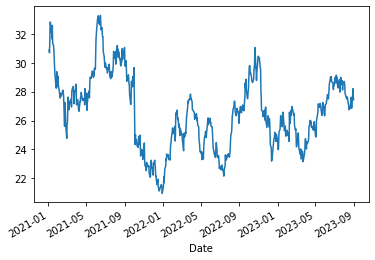

In [4]:
itub4.Close.plot();

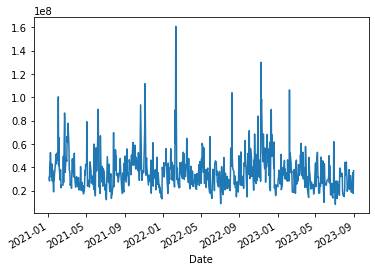

In [5]:
itub4.Volume.plot();

## Plot de cotação e volume

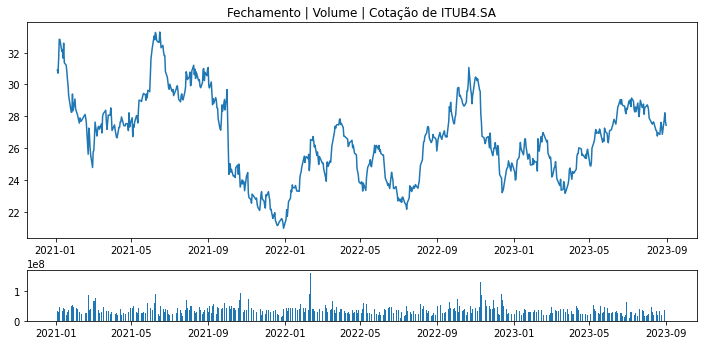

In [6]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(nrows=12, ncols=1)

ax1 = fig.add_subplot(gs[0:8, 0])
ax2 = fig.add_subplot(gs[9:11, 0])

ax1.plot(itub4.Close)
ax2.bar(itub4.index, itub4.Volume)

ax1.set_title(f'Fechamento | Volume | Cotação de {ativo}');

## Plot Candlestick

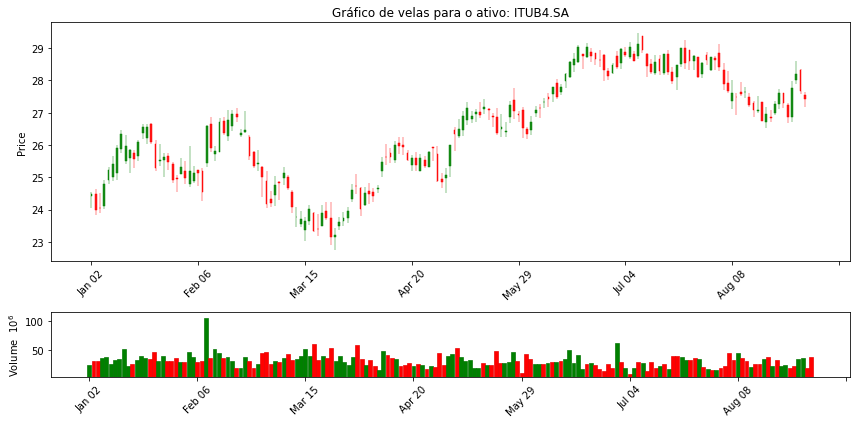

In [7]:
itub4.index = pd.to_datetime(itub4.index)

# Definir o estilo de cores das velas
colors = mpf.make_marketcolors(up='g', down='r', edge='i', wick='i', volume='in')

# Criar um estilo baseado nas cores definidas
s = mpf.make_mpf_style(marketcolors=colors)

# Especificar o período desejado (por exemplo, de '2023-01-01' a '2023-09-01')
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-09-01')

# Filtrar o DataFrame com base no período desejado
filtered_data = itub4[(itub4.index >= start_date) & (itub4.index <= end_date)]

fig = plt.figure(figsize=(12, 6))

# Criar um grid de subplots com proporção 70-30
ax1 = plt.subplot2grid((7, 1), (0, 0), rowspan=5)
ax2 = plt.subplot2grid((7, 1), (5, 0), rowspan=2)

mpf.plot(filtered_data, type='candle', style=s, ax=ax1, volume=ax2)
ax1.set_title(f'Gráfico de velas para o ativo: {ativo}')

plt.tight_layout()
plt.show()
